In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 1.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas as pd
import sqlite3
import os
import matplotlib.pylab as plt
import seaborn as sns

In [108]:
df=pd.read_csv('top10s.csv',encoding= "latin-1")

In [9]:
df.columns=df.columns.str.strip()
df.columns=df.columns.str.replace(".","")
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [11]:
conn=sqlite3.connect('database.db')
c=conn.cursor()

In [12]:
df.to_sql("TopSongss",conn)

603

In [13]:
c.execute('''SELECT*from TopSongss;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,index,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [ ]:
conn.close()

# GENRE

In [17]:
c.execute('''SELECT "top genre",count(*)
from TopSongs
group by "top genre"
order by count(*) desc;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,top genre,count(*)
0,dance pop,327
1,pop,60
2,canadian pop,34
3,boy band,15
4,barbadian pop,15
5,electropop,13
6,british soul,11
7,big room,10
8,neo mellow,9
9,canadian contemporary r&b,9


In [19]:
c.execute('''SELECT count(*) as 'PopSongs'
from TopSongs
where "top genre" like '%pop%';''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,PopSongs
0,485


In [20]:
c.execute('''SELECT count(*) as 'RapSongs'
from TopSongs
where "top genre" like '%rap%';''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,RapSongs
0,3


In [21]:
c.execute('''SELECT count(*) as 'HipHopSongs'
from TopSongs
where "top genre" like '%hip hop%';''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,HipHopSongs
0,14


In [23]:
c.execute('''SELECT count(*) as HouseSongs
from TopSongs
where "top genre" like '%house%';''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,HouseSongs
0,5


In [26]:
c.execute('''SELECT count(*) as EdmSongs
from TopSongs
where "top genre" like '%edm%';''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,EdmSongs
0,7


# BEATS PER MINUTE

In [33]:
c.execute('''SELECT avg(bpm)
from TopSongs;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,avg(bpm)
0,118.545605


In [34]:
c.execute('''SELECT Title,bpm,
(case when bpm > 118.545605 then 'Above Average'
when bpm = 118.545605 then 'Average'
when bpm < 118.545605 then 'Below Average' end)as CompareAverage
from TopSongss
limit 10;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,title,bpm,CompareAverage
0,"Hey, Soul Sister",97,Below Average
1,Love The Way You Lie,87,Below Average
2,TiK ToK,120,Above Average
3,Bad Romance,119,Above Average
4,Just the Way You Are,109,Below Average
5,Baby,65,Below Average
6,Dynamite,120,Above Average
7,Secrets,148,Above Average
8,Empire State of Mind (Part II) Broken Down,93,Below Average
9,Only Girl (In The World),126,Above Average


In [47]:
c.execute('''SELECT Title,bpm,
(case when bpm between 108.545605 and 128.545605 then 'Within 10'
when (bpm between 98.545605 and 108.545605) or (bpm between 128.545605 and 138.545605) then 'Within 20'
when (bpm between 88.545605 and 98.545605) or (bpm between 138.545605 and 148.545605)then 'Within 30'
else 'Greater than 30'
end)as CompareAverage
from TopSongs;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,title,bpm,CompareAverage
0,"Hey, Soul Sister",97,Within 30
1,Love The Way You Lie,87,Greater than 30
2,TiK ToK,120,Within 10
3,Bad Romance,119,Within 10
4,Just the Way You Are,109,Within 10
...,...,...,...
598,Find U Again (feat. Camila Cabello),104,Within 20
599,Cross Me (feat. Chance the Rapper & PnB Rock),95,Within 30
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",136,Within 20
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),114,Within 10


In [48]:
c.execute('''SELECT
sum(case when bpm between 108.545605 and 128.545605 then 1
else 0
end)as "Within 10",
sum(case when (bpm between 98.545605 and 108.545605) or (bpm between 128.545605 and 138.545605) then 1
else 0
end)as "Within 20",
sum(case when (bpm between 88.545605 and 98.545605) or (bpm between 138.545605 and 148.545605) then 1
else 0
end)as "Within 30",
sum(case when (bpm < 88.545605) or (bpm > 148.545605) then 1
else 0
end)as "Greater than 30"
from TopSongs;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,Within 10,Within 20,Within 30,Greater than 30
0,232,156,104,111


# ENERGY

In [39]:
c.execute('''SELECT avg(nrgy)
from TopSongs;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,avg(nrgy)
0,70.504146


In [41]:
c.execute('''SELECT Title,nrgy,
(case when nrgy > 70.504146 then 'Above Average'
when nrgy = 70.504146 then 'Average'
when nrgy < 70.504146 then 'Below Average'
end)as CompareAverage
from TopSongs
limit 10;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data


,title,nrgy,CompareAverage
0,"Hey, Soul Sister",89,Above Average
1,Love The Way You Lie,93,Above Average
2,TiK ToK,84,Above Average
3,Bad Romance,92,Above Average
4,Just the Way You Are,84,Above Average
5,Baby,86,Above Average
6,Dynamite,78,Above Average
7,Secrets,76,Above Average
8,Empire State of Mind (Part II) Broken Down,37,Below Average
9,Only Girl (In The World),72,Above Average


In [49]:
c.execute('''SELECT Title,nrgy,
(case
when nrgy between 60.504146 and 80.504146 then 'Within 10'
when (nrgy between 50.504146 and 60.504146) or (nrgy between 80.504146 and 90.504146) then 'Within 20'
when (nrgy between 40.504146 and 50.504146) or (nrgy between 90.504146 and 100.504146) then 'Within 30'
else 'Greater than 30'
end)as 'Compare Average'
from TopSongs;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,title,nrgy,Compare Average
0,"Hey, Soul Sister",89,Within 20
1,Love The Way You Lie,93,Within 30
2,TiK ToK,84,Within 20
3,Bad Romance,92,Within 30
4,Just the Way You Are,84,Within 20
...,...,...,...
598,Find U Again (feat. Camila Cabello),66,Within 10
599,Cross Me (feat. Chance the Rapper & PnB Rock),79,Within 10
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",76,Within 10
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),79,Within 10


In [50]:
c.execute('''SELECT
sum(case when nrgy between 60.504146 and 80.504146 then 1
else 0
end)as 'Within 10',
sum(case when (nrgy between 50.504146 and 60.504146) or (nrgy between 80.504146 and 90.504146) then 1
else 0
end)as 'Within 20',
sum(case when (nrgy between 40.504146 and 50.504146) or (nrgy between 90.504146 and 100.504146) then 1
else 0
end)as 'Within 30',
sum(case when (nrgy < 40.504146) or (nrgy > 100.504146) then 1
else 0
end)as 'Greater than 30'
from TopSongs;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,Within 10,Within 20,Within 30,Greater than 30
0,277,213,78,35


# DANCEABILITY

In [45]:
c.execute('''SELECT avg(dnce)
from TopSongs;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,avg(dnce)
0,64.379768


In [46]:
c.execute('''SELECT Title,dnce,
(case
when dnce between 54.379768 and 74.379768 then 'Within 10'
when (dnce between 44.379768 and 54.379768) or (dnce between 74.379768 and 84.379768) then 'Within 20'
when (dnce between 34.379768 and 44.379768) or (dnce between 84.379768 and 94.379768) then 'Within 30'
else 'Greater than 30'
end)as CompareAverage
from TopSongs;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,title,dnce,CompareAverage
0,"Hey, Soul Sister",67,Within 10
1,Love The Way You Lie,75,Within 20
2,TiK ToK,76,Within 20
3,Bad Romance,70,Within 10
4,Just the Way You Are,64,Within 10
...,...,...,...
598,Find U Again (feat. Camila Cabello),61,Within 10
599,Cross Me (feat. Chance the Rapper & PnB Rock),75,Within 20
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",53,Within 20
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),60,Within 10


In [52]:
c.execute('''SELECT
sum(case when dnce between 54.379768 and 74.379768 then 1
else 0
end)as 'Within 10',
sum(case when (dnce between 44.379768 and 54.379768) or (dnce between 74.379768 and 84.379768) then 1
else 0
end)as 'Within 20',
sum(case when (dnce between 34.379768 and 44.379768) or (dnce between 84.379768 and 94.379768) then 1
else 0
end)as 'Within 30',
sum(case when (dnce < 34.379768) or (dnce > 94.379768) then 1
else 0
end)as 'Greater than 30'
from TopSongs;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,Within 10,Within 20,Within 30,Greater than 30
0,353,177,52,21


# LOUDNESS

In [53]:
c.execute('''SELECT avg(dB)
from TopSongs;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,avg(dB)
0,-5.578773


In [55]:
c.execute('''SELECT Title,dB,
(case 
when dB > -5.578773 then 'Above Average'
when dB = -5.578773 then 'Average'
when dB < -5.578773 then 'Below Average'
end)as CompareAverage
from TopSongs
limit 10;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,title,dB,CompareAverage
0,"Hey, Soul Sister",-4,Above Average
1,Love The Way You Lie,-5,Above Average
2,TiK ToK,-3,Above Average
3,Bad Romance,-4,Above Average
4,Just the Way You Are,-5,Above Average
5,Baby,-5,Above Average
6,Dynamite,-4,Above Average
7,Secrets,-6,Below Average
8,Empire State of Mind (Part II) Broken Down,-8,Below Average
9,Only Girl (In The World),-4,Above Average


In [58]:
c.execute('''SELECT Title,dB,
(case
when dB between -6.578773 and -4.578773 then 'Within 1'
when (dB between -7.578773 and -6.578773) or (dB between -4.578773 and -3.578773) then 'Within 2'
when (dB between -8.578773 and -7.578773) or (dB between -3.578773 and -2.578773) then 'Within 3'
else 'Greater than 3'
end)as CompareAverage
from TopSongs;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,title,dB,CompareAverage
0,"Hey, Soul Sister",-4,Within 2
1,Love The Way You Lie,-5,Within 1
2,TiK ToK,-3,Within 3
3,Bad Romance,-4,Within 2
4,Just the Way You Are,-5,Within 1
...,...,...,...
598,Find U Again (feat. Camila Cabello),-7,Within 2
599,Cross Me (feat. Chance the Rapper & PnB Rock),-6,Within 1
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",-5,Within 1
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),-6,Within 1


In [60]:
c.execute('''SELECT
sum(case when dB between -6.578773
 and -4.578773
 then 1
else 0
end)as 'Within 1',
sum(case when (dB between -7.578773
 and -6.578773
) or (dB between -4.578773
 and -3.578773
) then 1
else 0
end)as 'Within 2',
sum(case when (dB between -8.578773
 and -7.578773
) or (dB between -3.578773
 and -2.578773
) then 1
else 0
end)as 'Within 3',
sum(case when (dB < -8.578773) or (dB > -2.578773) then 1
else 0
end)as 'Greater than 3'
from TopSongs;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,Within 1,Within 2,Within 3,Greater than 3
0,277,211,79,36


# LIVENESS

In [61]:
c.execute('''SELECT avg(Live)
from TopSongs;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,avg(Live)
0,17.774461


In [62]:
c.execute('''SELECT Title,Live,
(case 
when Live > 17.774461 then 'Above Average'
when Live = 17.774461 then 'Average'
when Live < 17.774461 then 'Below Average'
end)as CompareAverage
from TopSongs
limit 10;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,title,live,CompareAverage
0,"Hey, Soul Sister",8,Below Average
1,Love The Way You Lie,52,Above Average
2,TiK ToK,29,Above Average
3,Bad Romance,8,Below Average
4,Just the Way You Are,9,Below Average
5,Baby,11,Below Average
6,Dynamite,4,Below Average
7,Secrets,12,Below Average
8,Empire State of Mind (Part II) Broken Down,12,Below Average
9,Only Girl (In The World),7,Below Average


In [63]:
c.execute('''SELECT Title,Live,
(case
when Live between 14.774461 and 20.774461 then 'Within 3'
when (Live between 11.774461 and 14.774461) or (Live between 20.774461 and 23.774461) then 'Within 6'
when (Live between 8.774461 and 11.774461) or (Live between 23.774461 and 26.774461) then 'Within 9'
else 'Greater than 3'
end)as CompareAverage
from TopSongs;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,title,live,CompareAverage
0,"Hey, Soul Sister",8,Greater than 3
1,Love The Way You Lie,52,Greater than 3
2,TiK ToK,29,Greater than 3
3,Bad Romance,8,Greater than 3
4,Just the Way You Are,9,Within 9
...,...,...,...
598,Find U Again (feat. Camila Cabello),20,Within 3
599,Cross Me (feat. Chance the Rapper & PnB Rock),7,Greater than 3
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",9,Within 9
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),42,Greater than 3


In [64]:
c.execute('''SELECT
sum(case when Live between 14.774461 and 20.774461 then 1
else 0
end)as 'Within 3',
sum(case when (Live between 11.774461 and 14.774461) or (Live between 20.774461 and 23.774461) then 1
else 0
end)as 'Within 6',
sum(case when (Live between 8.774461 and 11.774461) or (Live between 23.774461 and 26.774461) then 1
else 0
end)as 'Within 9',
sum(case when (Live < 8.774461) or (Live > 26.774461) then 1
else 0
end)as 'Greater than 9'
from TopSongs;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,Within 3,Within 6,Within 9,Greater than 9
0,65,116,164,258


# VALENCE

In [12]:
c.execute('''SELECT avg(val)
from TopSongss;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,avg(val)
0,52.225539


In [14]:
c.execute('''SELECT Title,val,
(case 
when val > 52.225539 then 'Above Average'
when val = 52.225539 then 'Average'
when val < 52.225539 then 'Below Average'
end)as CompareAverage
from TopSongs
limit 10;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,title,val,CompareAverage
0,"Hey, Soul Sister",80,Above Average
1,Love The Way You Lie,64,Above Average
2,TiK ToK,71,Above Average
3,Bad Romance,71,Above Average
4,Just the Way You Are,43,Below Average
5,Baby,54,Above Average
6,Dynamite,82,Above Average
7,Secrets,38,Below Average
8,Empire State of Mind (Part II) Broken Down,14,Below Average
9,Only Girl (In The World),61,Above Average


In [15]:
c.execute('''SELECT Title,val,
(case
when val between 47.225539 and 57.225539 then 'Within 5'
when (val between 42.225539 and 47.225539) or (val between 57.225539 and 62.225539) then 'Within 10'
when (val between 37.225539 and 42.225539) or (val between 62.225539 and 67.225539) then 'Within 15'
else 'Greater than 15'
end)as CompareAverage
from TopSongs;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,title,val,CompareAverage
0,"Hey, Soul Sister",80,Greater than 15
1,Love The Way You Lie,64,Within 15
2,TiK ToK,71,Greater than 15
3,Bad Romance,71,Greater than 15
4,Just the Way You Are,43,Within 10
...,...,...,...
598,Find U Again (feat. Camila Cabello),16,Greater than 15
599,Cross Me (feat. Chance the Rapper & PnB Rock),61,Within 10
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",65,Within 15
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),24,Greater than 15


In [16]:
c.execute('''SELECT
sum(case when val between 47.225539 and 57.225539 then 1
else 0
end)as Within5,
sum(case when (val between 42.225539 and 47.225539) or (val between 57.225539 and 62.225539) then 1
else 0
end)as Within10,
sum(case when (val between 37.225539 and 42.225539) or (val between 62.225539 and 67.225539) then 1
else 0
end)as Within15,
sum(case when (val< 37.225539) or (live > 67.225539) then 1
else 0
end)as Greater15
from TopSongs;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,Within5,Within10,Within15,Greater15
0,95,89,87,173


# SPEECHINESS

In [17]:
c.execute('''SELECT avg(spch)
from TopSongs;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,avg(spch)
0,8.358209


In [32]:
c.execute('''SELECT Title,"top genre",spch
from TopSongss
where "top genre" like '%rap%';''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,title,top genre,spch
0,Monster,chicago rap,20
1,Let Me Love You,electronic trap,3
2,"Taki Taki (feat. Selena Gomez, Ozuna & Cardi B)",electronic trap,23


In [34]:
c.execute('''SELECT Title,"top genre",spch
from TopSongs
where spch >=36;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,title,top genre,spch
0,Like A G6,dance pop,45
1,Imma Be,dance pop,37
2,Castle Walls (feat. Christina Aguilera),atl hip hop,39
3,Castle Walls (feat. Christina Aguilera),atl hip hop,39
4,Moment 4 Life - Album Version (Edited),dance pop,38
5,How Ya Doin'? (feat. Missy Elliott),dance pop,48
6,I Luh Ya Papi,dance pop,42
7,Love Yourself,canadian pop,44
8,Love Yourself,canadian pop,44
9,Crying in the Club,dance pop,38


In [37]:
c.execute('''SELECT ((SELECT count(*)*1.0
from TopSongs
where "top genre" like '%pop%' and spch>=36)/count(*)*1.0)*100 as PopPercentWithHighSpeechiness
from TopSongs
where "top genre" like '%pop%';''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,PopPercentWithHighSpeechiness
0,1.85567


In [38]:
c.execute('''SELECT Title,spch,
(case 
when spch > 8.358209 then 'Above Average'
when spch = 8.358209 then 'Average'
when spch < 8.358209 then 'Below Average'
end)as CompareAverage
from TopSongs
limit 10;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,title,spch,CompareAverage
0,"Hey, Soul Sister",4,Below Average
1,Love The Way You Lie,23,Above Average
2,TiK ToK,14,Above Average
3,Bad Romance,4,Below Average
4,Just the Way You Are,4,Below Average
5,Baby,14,Above Average
6,Dynamite,9,Above Average
7,Secrets,4,Below Average
8,Empire State of Mind (Part II) Broken Down,3,Below Average
9,Only Girl (In The World),4,Below Average


In [39]:
c.execute('''SELECT Title,spch,
(case
when spch between 17.16 and 27.16 then 'Within 5'
when (spch between 12.16 and 17.15) or (spch between 27.17 and 32.16) then 'Within 10'
when (spch between 7.16 and 12.15) or (spch between 32.16 and 37.16) then 'Within 15'
else 'Greater than 15'
end)as CompareAverage
from TopSongs;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,title,spch,CompareAverage
0,"Hey, Soul Sister",4,Greater than 15
1,Love The Way You Lie,23,Within 5
2,TiK ToK,14,Within 10
3,Bad Romance,4,Greater than 15
4,Just the Way You Are,4,Greater than 15
...,...,...,...
598,Find U Again (feat. Camila Cabello),3,Greater than 15
599,Cross Me (feat. Chance the Rapper & PnB Rock),12,Within 15
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",34,Within 15
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),7,Greater than 15


In [40]:
c.execute('''SELECT
sum(case when spch between 17.16 and 27.16 then 1
else 0
end)as Within5,
sum(case when (spch between 12.16 and 17.15) or (spch between 27.17 and 32.16) then 1
else 0
end)as Within10,
sum(case when (spch between 7.16 and 12.15) or (spch between 32.16 and 37.16) then 1
else 0
end)as Within15,
sum(case when (spch < 7.16) or (spch > 37.16) then 1
else 0
end)as Greater15
from TopSongs;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,Within5,Within10,Within15,Greater15
0,37,42,117,407


# POPULARITY

In [41]:
c.execute('''SELECT avg(pop)
from TopSongs;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,avg(pop)
0,66.52073


In [42]:
c.execute('''SELECT Title,pop
from TopSongs
order by pop desc
limit 10;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data



,title,pop
0,Memories,99
1,Lose You To Love Me,97
2,Someone You Loved,96
3,Señorita,95
4,How Do You Sleep?,93
5,South of the Border (feat. Camila Cabello & Ca...,92
6,Trampoline (with ZAYN),92
7,Happier,90
8,Truth Hurts,90
9,Good as Hell (feat. Ariana Grande) - Remix,90


In [43]:
c.execute('''SELECT Title,pop,
(case 
when pop > 66.52073 then 'Above Average'
when pop = 66.52073 then 'Average'
when pop < 66.52073 then 'Below Average'
end)as CompareAverage
from TopSongs
limit 10;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,title,pop,CompareAverage
0,"Hey, Soul Sister",83,Above Average
1,Love The Way You Lie,82,Above Average
2,TiK ToK,80,Above Average
3,Bad Romance,79,Above Average
4,Just the Way You Are,78,Above Average
5,Baby,77,Above Average
6,Dynamite,77,Above Average
7,Secrets,77,Above Average
8,Empire State of Mind (Part II) Broken Down,76,Above Average
9,Only Girl (In The World),73,Above Average


In [45]:
c.execute('''SELECT title,pop,
(case
when pop between 63.52073 and 69.52073 then 'Within 3'
when (pop between 60.52073 and 63.52073) or (pop between 69.52073 and 72.52073) then 'Within 6'
when (pop between 57.52073 and 60.52073) or (pop between 72.52073 and 75.52073) then 'Within 9'
else 'Greater than 9'
end)as CompareAverage
from TopSongs;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,title,pop,CompareAverage
0,"Hey, Soul Sister",83,Greater than 9
1,Love The Way You Lie,82,Greater than 9
2,TiK ToK,80,Greater than 9
3,Bad Romance,79,Greater than 9
4,Just the Way You Are,78,Greater than 9
...,...,...,...
598,Find U Again (feat. Camila Cabello),75,Within 9
599,Cross Me (feat. Chance the Rapper & PnB Rock),75,Within 9
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",70,Within 6
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),69,Within 3


In [46]:
c.execute('''SELECT
sum(case when pop between 63.52073 and 69.52073 then 1
else 0
end)as Within3,
sum(case when (pop between 60.52073 and 63.52073) or (pop between 69.52073 and 72.52073) then 1
else 0
end)as Within6,
sum(case when (pop between 57.52073 and 60.52073) or (pop between 72.52073 and 75.52073) then 1
else 0
end)as Within9,
sum(case when (pop < 57.52073) or (pop > 75.52073) then 1
else 0
end)as Greater9
from TopSongs;''')
data=pd.DataFrame(c.fetchall())
data.columns=[x[0] for x in c.description]
data

,Within3,Within6,Within9,Greater9
0,113,108,84,298


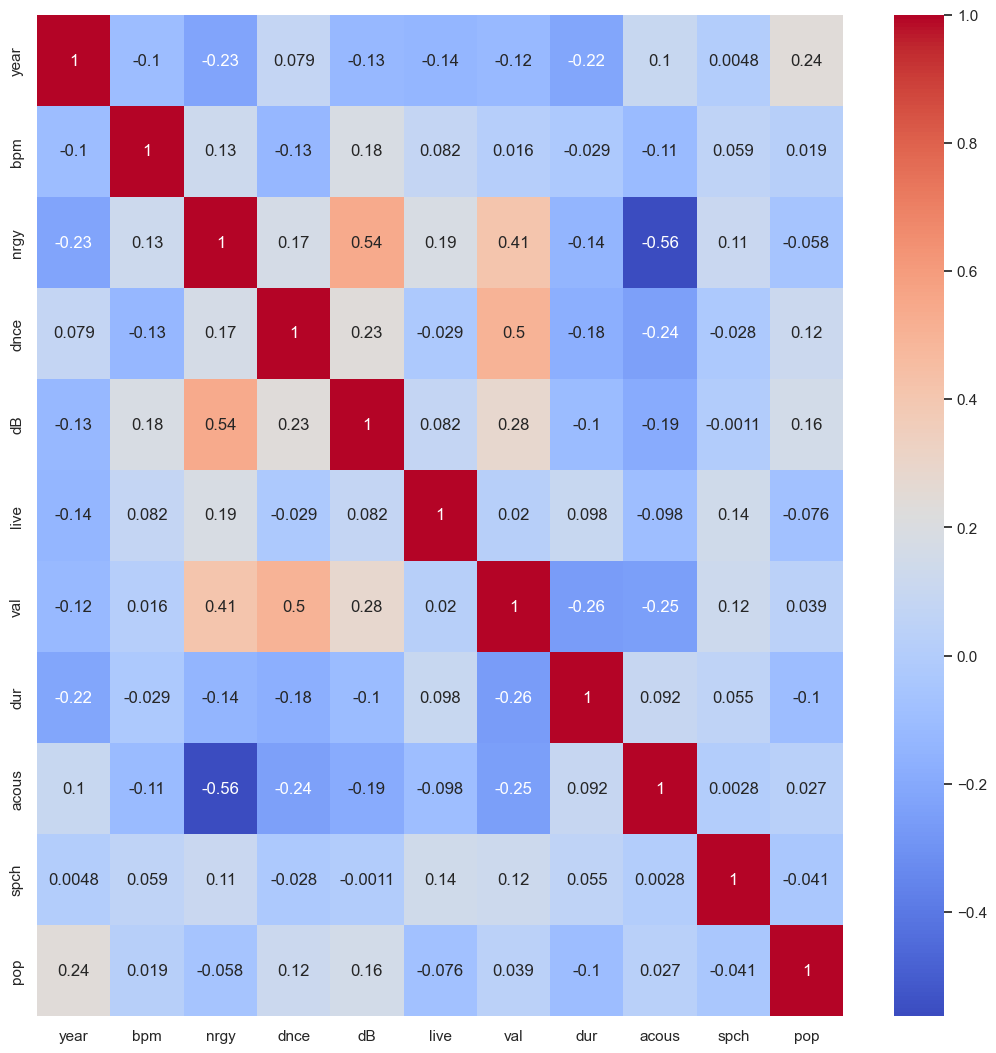

In [60]:
# heatmap of all numerical variables
selected_columns = df[['year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']]

sns.set_theme(rc={'figure.figsize': (13, 13)})
colormap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(selected_columns.corr(), cmap=colormap, annot=True)

plt.show()


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'bpm'}>],
       [<Axes: title={'center': 'nrgy'}>,
        <Axes: title={'center': 'dnce'}>, <Axes: title={'center': 'dB'}>],
       [<Axes: title={'center': 'live'}>,
        <Axes: title={'center': 'val'}>, <Axes: title={'center': 'dur'}>],
       [<Axes: title={'center': 'acous'}>,
        <Axes: title={'center': 'spch'}>,
        <Axes: title={'center': 'pop'}>]], dtype=object)

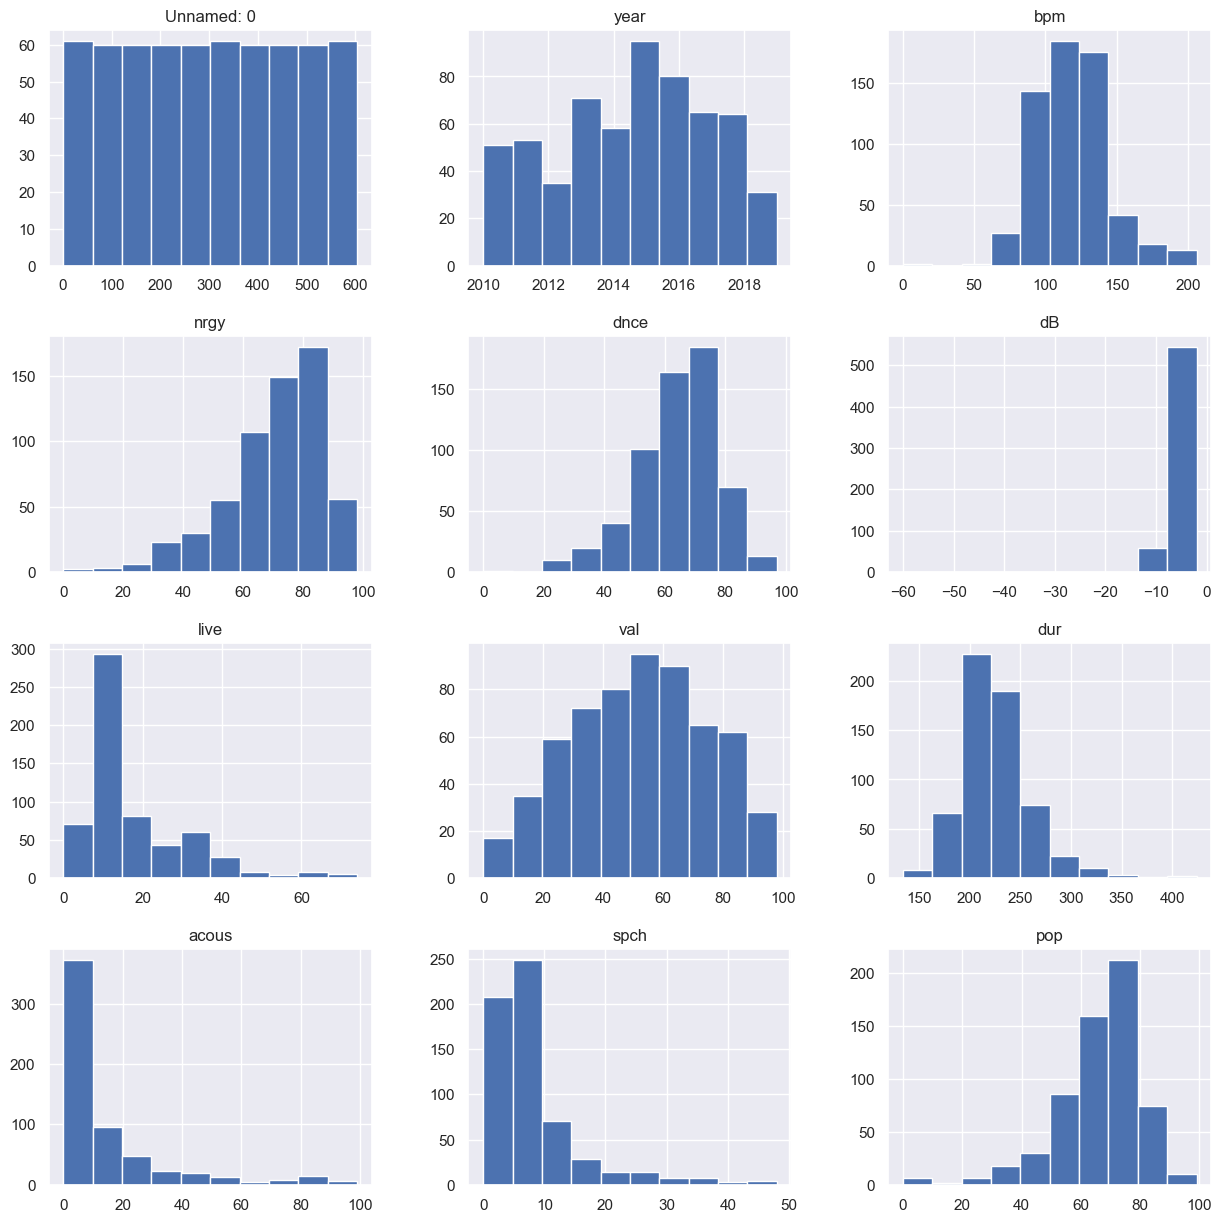

In [61]:
# histogram for all variables
df.hist(figsize= [15, 15])

In [63]:
# Query the Artist with Top Songs and Count of Top Songs Each Artist has
c.execute('''SELECT artist, COUNT(*)
            FROM TopSongs
            GROUP BY artist
            ORDER BY COUNT(*) DESC;''')
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df_top_ten = df.head(10)
df_top_ten

,artist,COUNT(*)
0,Katy Perry,17
1,Justin Bieber,16
2,Rihanna,15
3,Maroon 5,15
4,Lady Gaga,14
5,Bruno Mars,13
6,The Chainsmokers,11
7,Shawn Mendes,11
8,Pitbull,11
9,Ed Sheeran,11


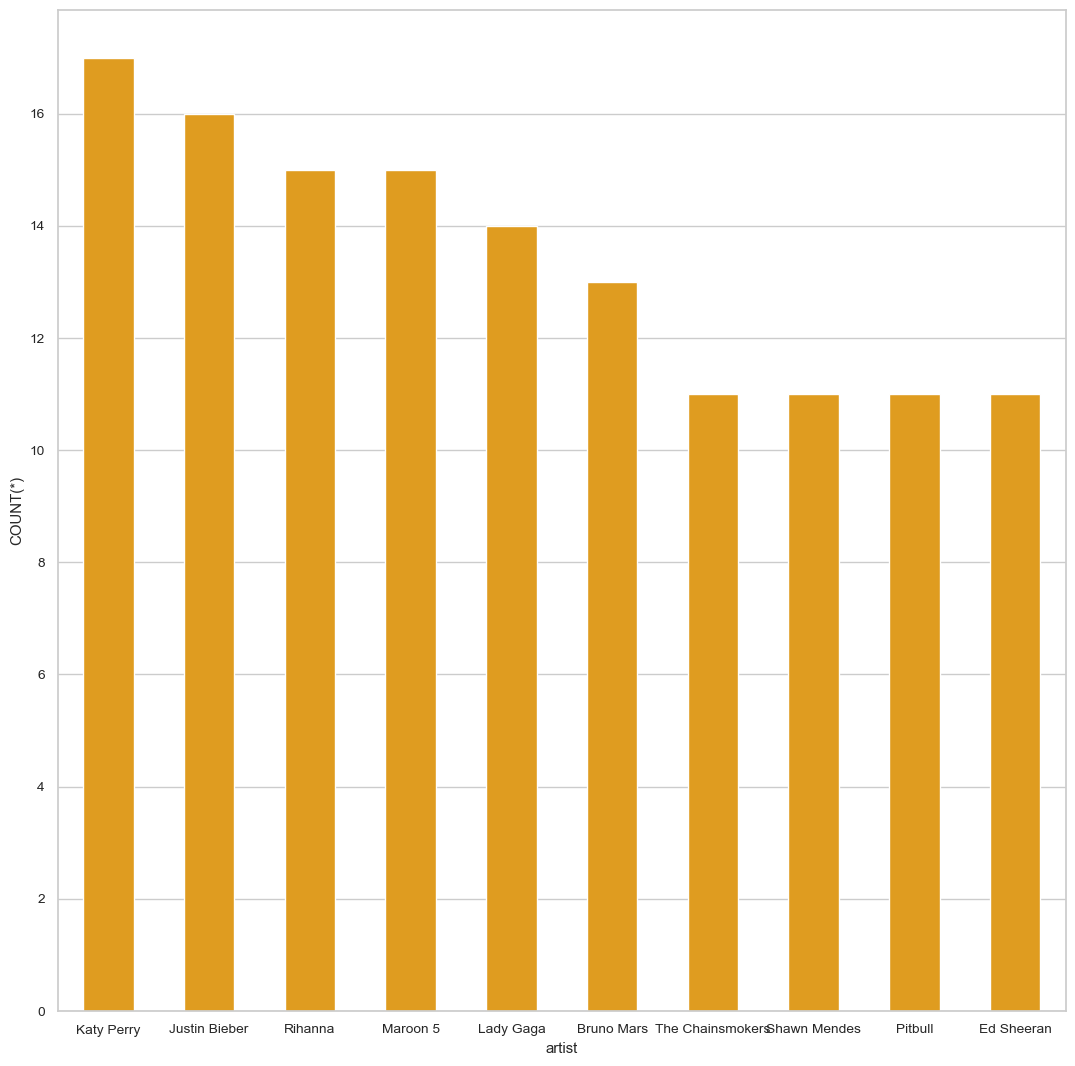

In [127]:
sns.barplot(x="artist", y="COUNT(*)", color="Orange", data=df_top_ten, width=0.5)
sns.set(style="whitegrid", font_scale=0.9)

In [118]:
nrgy_column = df['nrgy']
print(nrgy_column)
acous_column= df['acous']
print(acous_column)


0      89
1      93
2      84
3      92
4      84
       ..
598    66
599    79
600    76
601    79
602    44
Name: nrgy, Length: 603, dtype: int64
0      19
1      24
2      10
3       0
4       2
       ..
598     1
599    21
600     7
601     1
602     6
Name: acous, Length: 603, dtype: int64


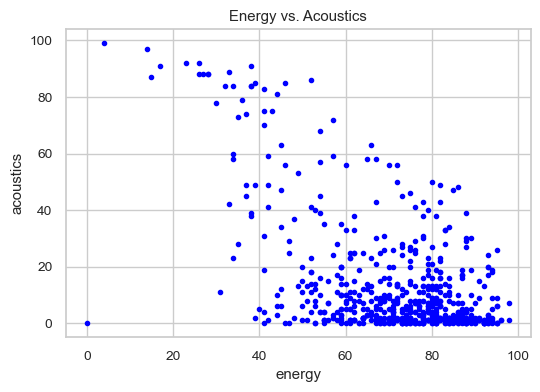

In [119]:
plt.figure(figsize=(6, 4))
plt.scatter(x=nrgy_column, y=acous_column, color='blue', marker='.', label='Data Points')
plt.xlabel('energy')
plt.ylabel('acoustics')
plt.title('Energy vs. Acoustics')

plt.show()

In [120]:
dB_column= df['dB']
print(acous_column)
dnce_column = df['dnce']
print(nrgy_column)



0      19
1      24
2      10
3       0
4       2
       ..
598     1
599    21
600     7
601     1
602     6
Name: acous, Length: 603, dtype: int64
0      89
1      93
2      84
3      92
4      84
       ..
598    66
599    79
600    76
601    79
602    44
Name: nrgy, Length: 603, dtype: int64


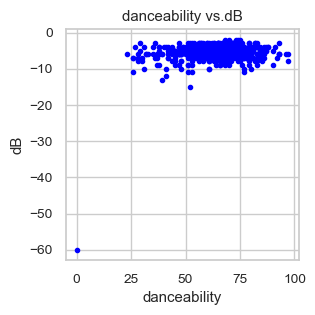

In [124]:
plt.figure(figsize=(3, 3))
plt.scatter(x=dnce_column, y=dB_column, color='blue', marker='.', label='Data Points')
plt.xlabel('danceability')
plt.ylabel('dB')
plt.title('danceability vs.dB')

plt.show()

In [130]:
bpm_column= df['bpm']
print(bpm_column)
dnce_column = df['dnce']
print(dnce_column)

0       97
1       87
2      120
3      119
4      109
      ... 
598    104
599     95
600    136
601    114
602    150
Name: bpm, Length: 603, dtype: int64
0      67
1      75
2      76
3      70
4      64
       ..
598    61
599    75
600    53
601    60
602    70
Name: dnce, Length: 603, dtype: int64


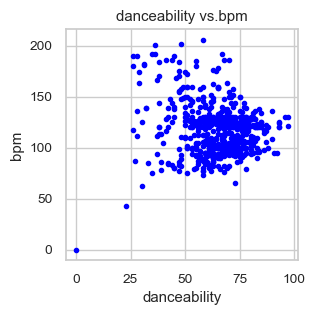

In [131]:
plt.figure(figsize=(3, 3))
plt.scatter(x=dnce_column, y=bpm_column, color='blue', marker='.', label='Data Points')
plt.xlabel('danceability')
plt.ylabel('bpm')
plt.title('danceability vs.bpm')

plt.show()

In [132]:
bpm_column= df['bpm']
print(bpm_column)
dur_column = df['dur']
print(dur_column)

0       97
1       87
2      120
3      119
4      109
      ... 
598    104
599     95
600    136
601    114
602    150
Name: bpm, Length: 603, dtype: int64
0      217
1      263
2      200
3      295
4      221
      ... 
598    176
599    206
600    260
601    217
602    213
Name: dur, Length: 603, dtype: int64


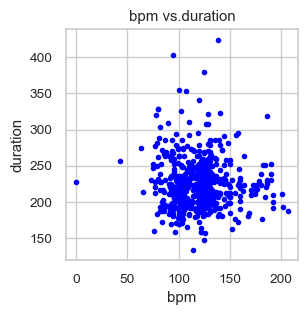

In [133]:
plt.figure(figsize=(3, 3))
plt.scatter(x=bpm_column, y=dur_column, color='blue', marker='.', label='Data Points')
plt.xlabel('bpm')
plt.ylabel('duration')
plt.title('bpm vs.duration')

plt.show()

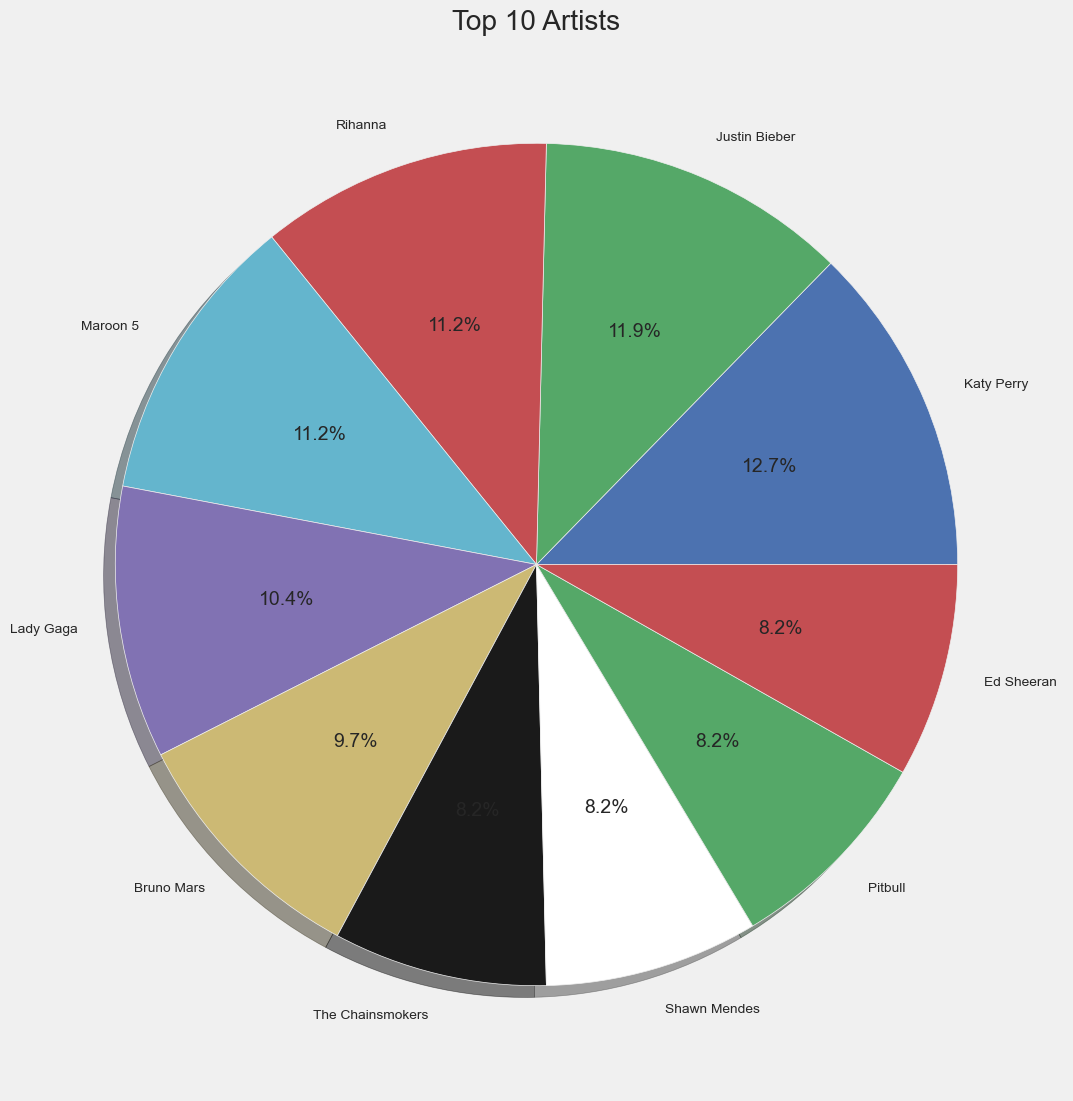

<Figure size 0x0 with 0 Axes>

In [150]:
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
slices=[17,16,15,15,14,13,11,11,11,11]
labels=['Katy Perry','Justin Bieber','Rihanna','Maroon 5','Lady Gaga','Bruno Mars','The Chainsmokers','Shawn Mendes','Pitbull','Ed Sheeran']
colours=['b','g','r','c','m','y','k','w','g','r']
plt.pie(slices,labels=labels,colors=colours,shadow='true',autopct='%1.1f%%')
plt.title('Top 10 Artists')
plt.tight_layout()
plt.show()